In [1]:
# Install library to perform post-hoc tests
!pip install scikit-posthocs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 34.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kruskal
import seaborn as sns
from scipy.stats import shapiro
import pylab
import scipy.stats as stats

# https://www.geeksforgeeks.org/how-to-perform-dunns-test-in-python/
import scikit_posthocs as sp

# Data preparing

In [3]:
# Import data 
data = pd.read_csv('ds_salaries.csv')
data.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
# Get info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
# Drop unnecessary columns that represent salary in different currencies
data.drop(['salary', 'salary_currency'], inplace=True, axis=1)
data.head()

,id,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


# Functions for data analysis

In [6]:
# Hypothesis testing using Kruskal-Wallis test for 4 groups
def test_kruskal_4_groups(data1, data2, data3, data4, alpha=0.05):
    _, p = kruskal(data1, data2, data3, data4)
    print("p-Value of Kruskal-Wallis Test:", p)
    if (p<alpha):
        print("Can reject H0")
    else:
        print("Failed to reject H0")

In [7]:
# Hypothesis testing using Kruskal-Wallis test for 3 groups
def test_kruskal_3_groups(data1, data2, data3, alpha=0.05):
    _, p = kruskal(data1, data2, data3)
    print("p-Value of Kruskal-Wallis Test:", p)
    if (p<alpha):
        print("Can reject H0")
    else:
        print("Failed to reject H0")

In [8]:
# Hypothesis testing using Dunns test
def dunn_test(joined_data, column_names):
    print("Dunns Test:")
    p_values= sp.posthoc_dunn(joined_data, p_adjust = 'holm')
    p_values.columns = column_names
    p_values.index = column_names
    print(p_values)
    print()

In [9]:
# Plotting bars of salaries depending on different aspects
def plot_salaries(ax, x_value, salaries, title, x_label):
    ax.bar(x_value, salaries, width=0.4)
    ax.set_title(title)
    ax.set_ylabel('Salary in USD')
    ax.set_xlabel(x_label)

In [10]:
# Print values
def print_values(names, values):
    for i, j in zip(names, values):
        print(i, ":", j)
    print()

In [11]:
# Plotting density function of data
def plot_density(ax, data, title, bin_num):
    # Plot histogram
    ax.hist(data, bin_num, density=True, alpha=0.7, color='blue')
    ax.set_title(title)
    ax.set_xlabel('Values')
    ax.set_ylabel('Probability Density')

In [12]:
# Plotting qq-plot
def qq_plot(data):
    stats.probplot(data, dist="norm", plot=pylab)
    pylab.show()

In [13]:
# Remove outliers using z-score
def remove_outliers(data, threshold_z=1):
    z = np.abs(stats.zscore(data))
 
    outlier_indices = np.where(z > threshold_z)[0]
    print("Original DataFrame Shape:", data.shape)
    for i in outlier_indices:
        without_outliers = data.drop(data.index[outlier_indices])
    print("DataFrame Shape after Removing Outliers:", without_outliers.shape)
    return without_outliers

In [14]:
# Check normality of data using Shapiro-Wilk test
def check_normality(data, alpha=0.05):
    stat, p = shapiro(data)
    print(stat, p)
    if p > alpha:
        print("Data is normally distributed (fail to reject H0)")
    else:
        print("Data is not normally distributed (reject H0)")

# Analysing the whole data

## Salary means depending on years

### Plotting means of salary for each year

work_year
2020     95813.000000
2021     99853.792627
2022    124522.006289
Name: salary_in_usd, dtype: float64


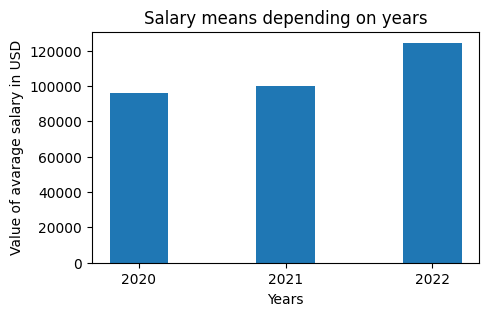

In [15]:
# Calculate and print the mean of salary depending on years
year_salary = data.groupby(by='work_year')['salary_in_usd'].mean()
print(year_salary) 

# Creating the bar plot for salary means
fig = plt.figure(figsize = (5, 3))
plt.bar(['2020', '2021', '2022'], year_salary.iloc[:], width=0.4)
plt.xlabel("Years")
plt.ylabel("Value of avarage salary in USD")
plt.title("Salary means depending on years")
plt.show()

### Checking normality of salary for each year

We want to perform t-test for mean of salary for each year. Therefore, we need to check normality of salary for each year.

In [16]:
# Collect salary data for each year
salary_2020 = data.loc[data['work_year']==2020]
salary_2021 = data.loc[data['work_year']==2021]
salary_2022 = data.loc[data['work_year']==2022]

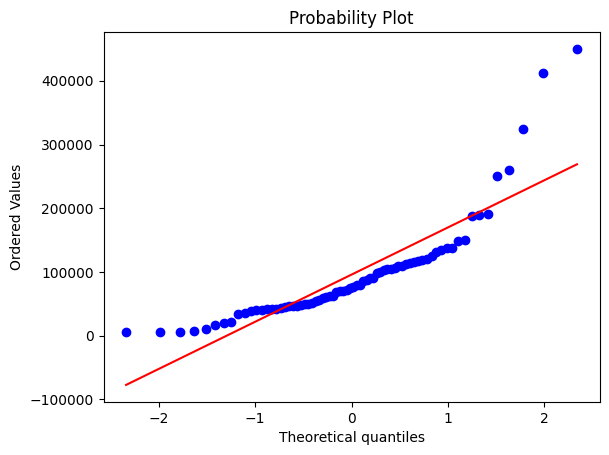

In [17]:
# Plot qq-plot for 2020 year
qq_plot(salary_2020['salary_in_usd'])

Original DataFrame Shape: (72,)
DataFrame Shape after Removing Outliers: (69,)


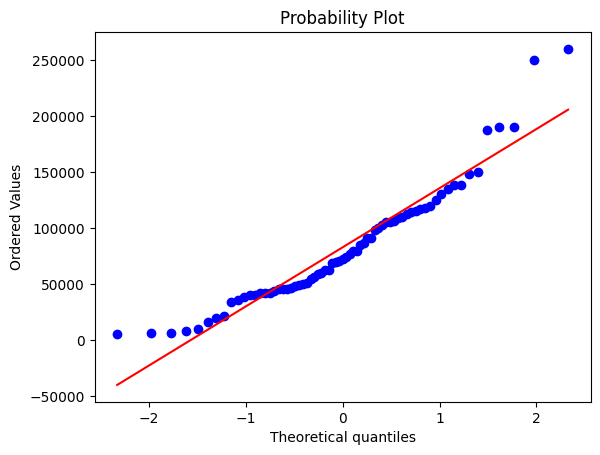

0.9236860871315002 0.00042499357368797064
Data is not normally distributed (reject H0)


In [18]:
# Remove outliers to perform accurate normality test
without_outliers = remove_outliers(salary_2020['salary_in_usd'], threshold_z=2)
qq_plot(without_outliers)

# Check normality
check_normality(without_outliers)

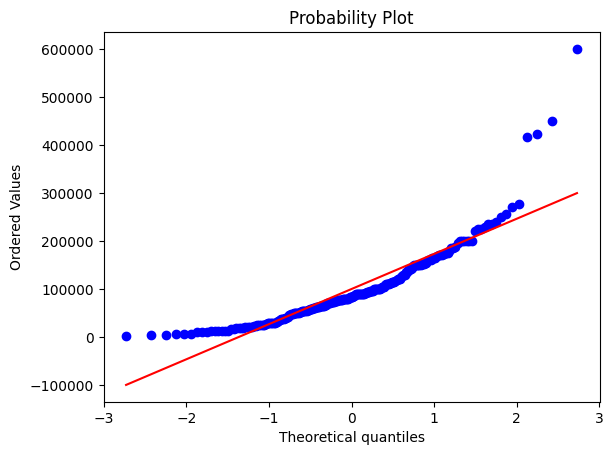

In [19]:
# Plot qq-plot for 2021 year
qq_plot(salary_2021['salary_in_usd'])

Original DataFrame Shape: (217,)
DataFrame Shape after Removing Outliers: (211,)


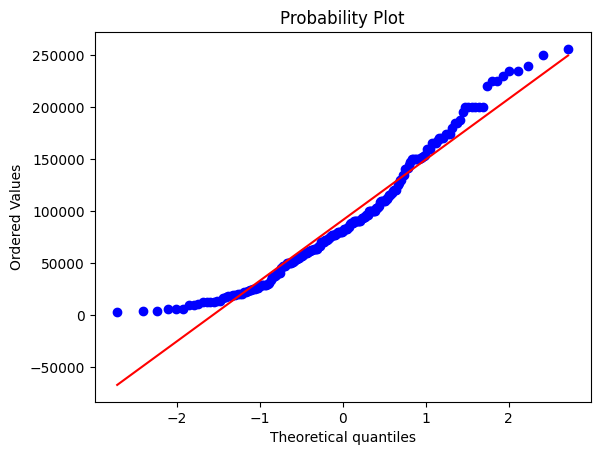

0.9498654007911682 1.017867816699436e-06
Data is not normally distributed (reject H0)


In [20]:
# Remove outliers in 2021
without_outliers = remove_outliers(salary_2021['salary_in_usd'], threshold_z=2)
qq_plot(without_outliers)

# Check normality
check_normality(without_outliers)

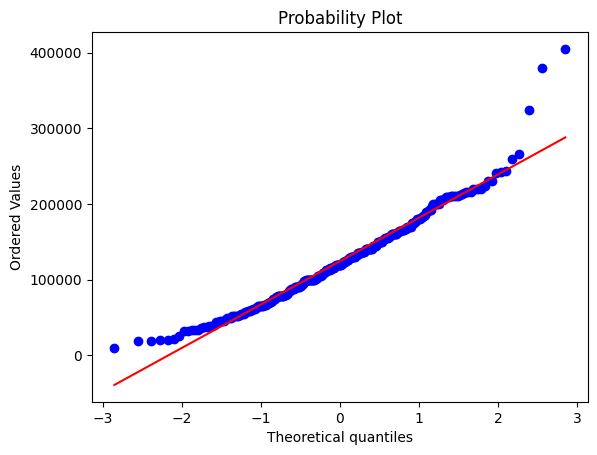

In [21]:
# Plot qq-plot for 2022 year
qq_plot(salary_2022['salary_in_usd'])

Original DataFrame Shape: (318,)
DataFrame Shape after Removing Outliers: (310,)


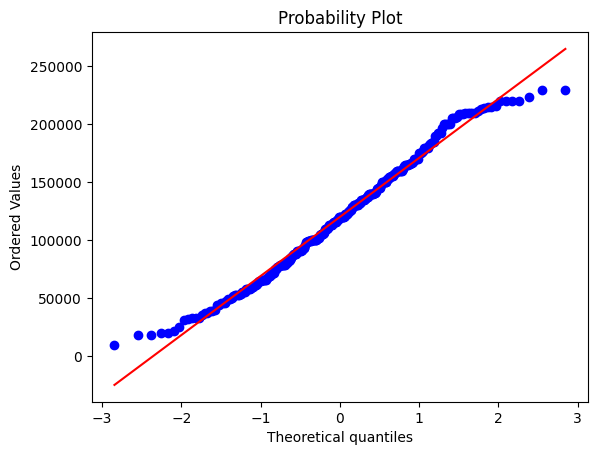

0.9845683574676514 0.002074885182082653
Data is not normally distributed (reject H0)


In [22]:
# Remove outliers in 2022
without_outliers = remove_outliers(salary_2022['salary_in_usd'], threshold_z=2)
qq_plot(without_outliers)

# Check normality
check_normality(without_outliers)

## Salary depending on experience level

In [23]:
# Group data by experience level
experience_MI = data.loc[data['experience_level']=='MI']['salary_in_usd']
experience_SE = data.loc[data['experience_level']=='SE']['salary_in_usd']
experience_EN = data.loc[data['experience_level']=='EN']['salary_in_usd']
experience_EX = data.loc[data['experience_level']=='EX']['salary_in_usd']

### Shape distribution checking

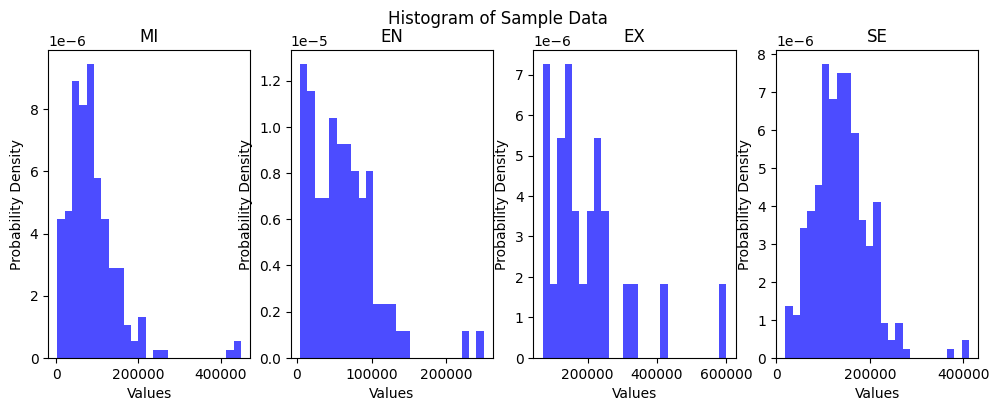

In [24]:
bins = 25
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
# Plot histogram
fig.suptitle('Histogram of Sample Data')
plot_density(axes[0], experience_MI, 'MI', bins)
plot_density(axes[1], experience_EN, 'EN', bins)
plot_density(axes[2], experience_EX, 'EX', bins)
plot_density(axes[3], experience_SE, 'SE', bins)

plt.show()

### Hypothesis testing

#### Hypotheses
$H_0$: there is no significant difference between salary median of junior, middle, senior, executive specialists taking into account all jobs
$H_1$: there is significant difference

In [25]:
# Print sizes of each group
print('Size of MI:', experience_MI.shape[0])
print('Size of SE:', experience_SE.shape[0])
print('Size of EN:', experience_EN.shape[0])
print('Size of EX:', experience_EX.shape[0])

# Perform Kruskal-Wallis test for 4 groups
test_kruskal_4_groups(experience_MI, experience_SE, experience_EN, experience_EX)

Size of MI: 213
Size of SE: 280
Size of EN: 88
Size of EX: 26
p-Value of Kruskal-Wallis Test: 5.777441885479927e-41
Can reject H0


p-value=5.777441885479927e-41 is less than 0.05, therefore we can reject the null hypothesis. Furthermore, to understand between which types of experience there can be difference we can conduct post hoc Dunn test.

In [26]:
joined_data = [experience_MI, experience_SE, experience_EN, experience_EX]
column_names = ["MI", "SE", "EN", "EX"]

# Perform the posthoc_dunn() function
dunn_test(joined_data, column_names)

Dunns Test:
              MI            SE            EN            EX
MI  1.000000e+00  3.255534e-23  2.159137e-03  2.980969e-10
SE  3.255534e-23  1.000000e+00  7.578934e-27  3.734880e-02
EN  2.159137e-03  7.578934e-27  1.000000e+00  1.359362e-14
EX  2.980969e-10  3.734880e-02  1.359362e-14  1.000000e+00



According to the results of the test and using the 0.05 significance level, we can conclude that all groups can be pairwise different. 

### Plotting analysing data

Mean salaries depending on experience:
MI : 87996.05633802817
SE : 138617.29285714286
EN : 61643.318181818184
EX : 199392.03846153847

Median salaries depending on experience:
MI : 76940.0
SE : 135500.0
EN : 56500.0
EX : 171437.5



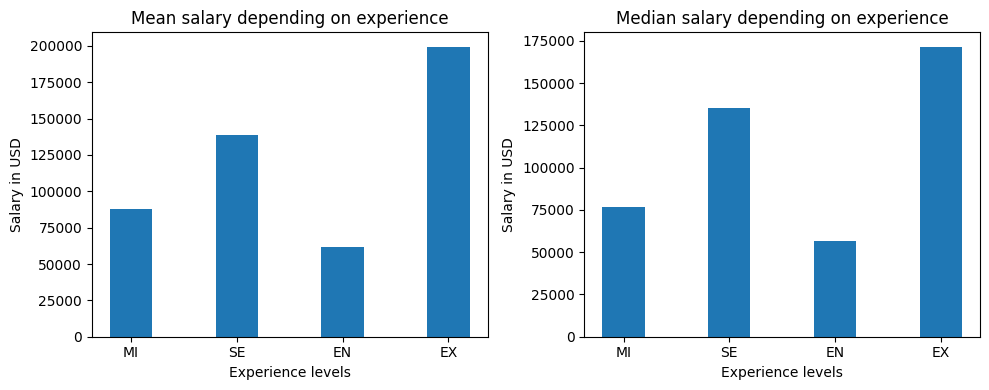

In [27]:
# Create the bar plot for salary means and medians
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

# Plot means on the left subplot
mean_salaries = [experience_MI.mean(), experience_SE.mean(), experience_EN.mean(), experience_EX.mean()]
plot_salaries(axes[0], column_names, mean_salaries, 'Mean salary depending on experience', 'Experience levels')

# Plot medians on the right subplot
median_salaries = [experience_MI.median(), experience_SE.median(), experience_EN.median(), experience_EX.median()]
plot_salaries(axes[1], column_names, median_salaries, 'Median salary depending on experience', 'Experience levels')

print("Mean salaries depending on experience:")
print_values(column_names, mean_salaries)

print("Median salaries depending on experience:")
print_values(column_names, median_salaries)

# Adjust layout
plt.tight_layout()
    
# Show the plot
plt.show()

Consequently, we can conclude that it is very likely that the level of experience affects the salary of an IT specialist.

## Salary depending on remote ratio

### Plotting remote types for each year

remote_ratio
0      15
50     21
100    36
dtype: int64
remote_ratio
0       34
50      66
100    117
dtype: int64
remote_ratio
0       78
50      12
100    228
dtype: int64


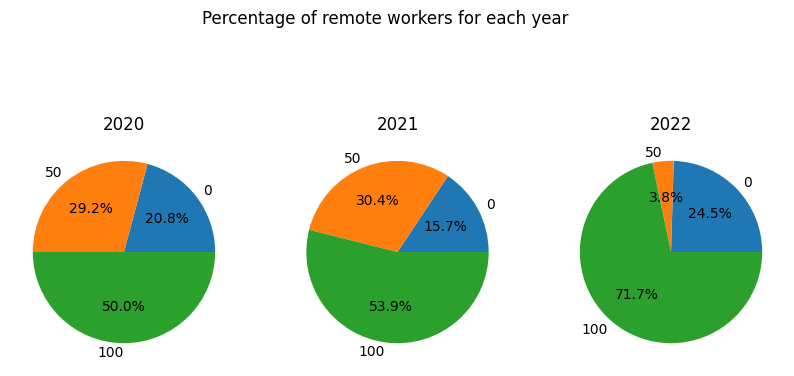

In [28]:
# Collecting data for 2020, 2021 and 2022
workers_2020 = data.loc[data['work_year']==2020]
workers_2021 = data.loc[data['work_year']==2021]
workers_2022 = data.loc[data['work_year']==2022]

# Print sizes of each group
print(workers_2020.groupby('remote_ratio').size())
print(workers_2021.groupby('remote_ratio').size())
print(workers_2022.groupby('remote_ratio').size())

# Create pie charts of percentage of remote workers for each year
fig, ax = plt.subplots(1, 3, figsize = (10, 5))
ax[0].pie(np.array(workers_2020.groupby('remote_ratio').size()), labels=['0', '50', '100'], autopct='%1.1f%%')
ax[1].pie(np.array(workers_2021.groupby('remote_ratio').size()), labels=['0', '50', '100'], autopct='%1.1f%%')
ax[2].pie(np.array(workers_2022.groupby('remote_ratio').size()), labels=['0', '50', '100'], autopct='%1.1f%%')
fig.suptitle('Percentage of remote workers for each year')
ax[0].set_title('2020')
ax[1].set_title('2021')
ax[2].set_title('2022')
plt.show()

In [29]:
# Collect data depending on remote ratio
remote_0 = data.loc[data['remote_ratio']==0]
remote_50 = data.loc[data['remote_ratio']==50]
remote_100 = data.loc[data['remote_ratio']==100]

### Shape distribution checking

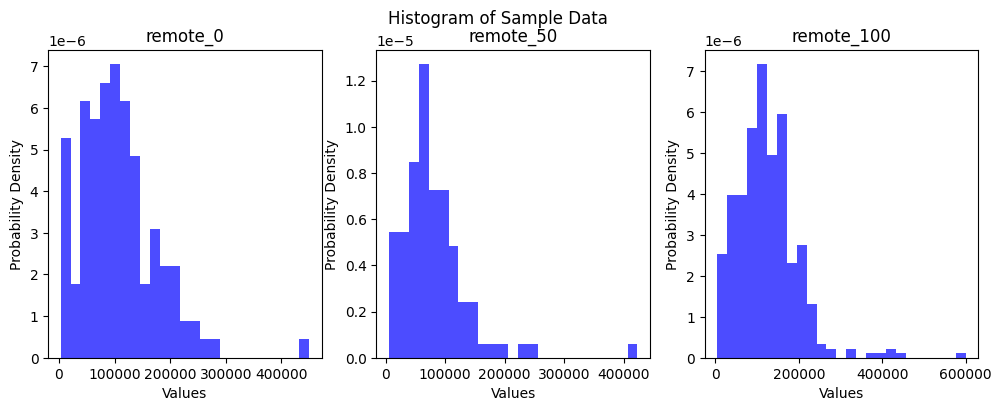

In [30]:
# Checking the shape of each group
bins = 25
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot histogram
fig.suptitle('Histogram of Sample Data')
plot_density(axes[0], remote_0['salary_in_usd'], 'remote_0', bins)
plot_density(axes[1], remote_50['salary_in_usd'], 'remote_50', bins)
plot_density(axes[2], remote_100['salary_in_usd'], 'remote_100', bins)

plt.show()

### Hypothesis testing

#### Hypotheses
$H_0$: there is no significant difference between salary median of workers who have different remote ratio (0, 50, 100) taking into account all jobs
$H_1$: there is significant difference

In [31]:
# Print sizes of each group
print(remote_0.groupby('remote_ratio').size())
print(remote_50.groupby('remote_ratio').size())
print(remote_100.groupby('remote_ratio').size())

# Perform Kruskal-Wallis test for 3 groups
test_kruskal_3_groups(remote_0['salary_in_usd'], remote_50['salary_in_usd'], remote_100['salary_in_usd'])

remote_ratio
0    127
dtype: int64
remote_ratio
50    99
dtype: int64
remote_ratio
100    381
dtype: int64
p-Value of Kruskal-Wallis Test: 1.950760665277205e-09
Can reject H0


In [32]:
column_names = ["remote_0", "remote_50", "remote_100"]
joined_data = [remote_0['salary_in_usd'], remote_50['salary_in_usd'], remote_100['salary_in_usd']]

# Perform the posthoc_dunn() function
dunn_test(joined_data, column_names)

Dunns Test:
            remote_0     remote_50    remote_100
remote_0    1.000000  1.423617e-03  1.444651e-02
remote_50   0.001424  1.000000e+00  1.274067e-09
remote_100  0.014447  1.274067e-09  1.000000e+00



According to the results of the test and using the 0.05 significance level, we can conclude that all groups can be pairwise different. 

### Plotting analysing data

Mean salaries depending on remote type:
remote_0 : 106354.62204724409
remote_50 : 80823.0303030303
remote_100 : 122457.45406824147

Median salaries depending on remote type:
remote_0 : 99000.0
remote_50 : 69999.0
remote_100 : 115000.0



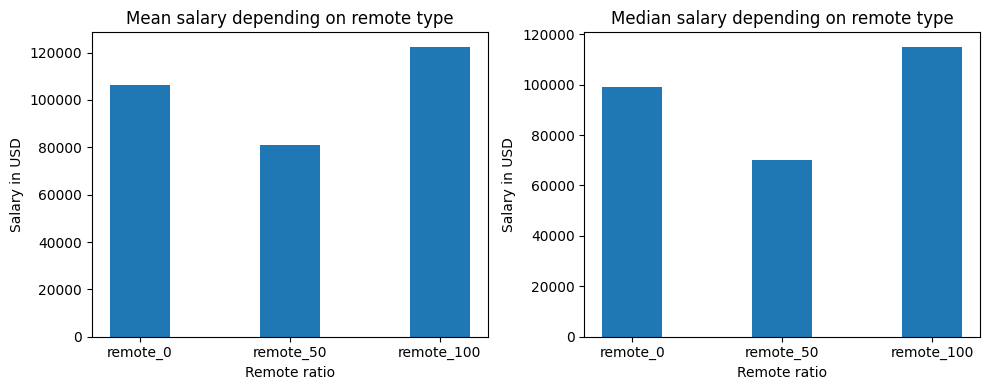

In [33]:
# Create the bar plot for salary means and medians depending on remote type
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

# Plot means on the left subplot
mean_salaries = [remote_0['salary_in_usd'].mean(), remote_50['salary_in_usd'].mean(), remote_100['salary_in_usd'].mean()]
plot_salaries(axes[0], column_names, mean_salaries, 'Mean salary depending on remote type', 'Remote ratio')

# Plot medians on the right subplot
median_salaries = [remote_0['salary_in_usd'].median(), remote_50['salary_in_usd'].median(), remote_100['salary_in_usd'].median()]
plot_salaries(axes[1], column_names, median_salaries, 'Median salary depending on remote type', 'Remote ratio')

print("Mean salaries depending on remote type:")
print_values(column_names, mean_salaries)

print("Median salaries depending on remote type:")
print_values(column_names, median_salaries)

# Adjust layout
plt.tight_layout()
    
# Show the plot
plt.show()

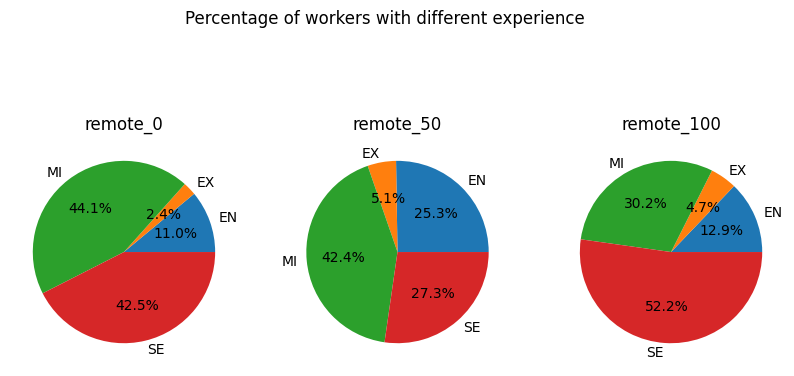

In [34]:
# Create pie charts of percentage of workers with different experience for each remote type
fig, ax = plt.subplots(1, 3, figsize = (10, 5))
ax[0].pie(np.array(remote_0.groupby('experience_level').size()), labels=['EN', 'EX', 'MI', 'SE'], autopct='%1.1f%%')
ax[1].pie(np.array(remote_50.groupby('experience_level').size()), labels=['EN', 'EX', 'MI', 'SE'], autopct='%1.1f%%')
ax[2].pie(np.array(remote_100.groupby('experience_level').size()), labels=['EN', 'EX', 'MI', 'SE'], autopct='%1.1f%%')
fig.suptitle('Percentage of workers with different experience')
ax[0].set_title('remote_0')
ax[1].set_title('remote_50')
ax[2].set_title('remote_100')
plt.show()

## Salary depending on company size

In [35]:
# Collect data depending on company size
company_L = data.loc[data['company_size']=='L']
company_M = data.loc[data['company_size']=='M']
company_S = data.loc[data['company_size']=='S']

### Shape distribution checking

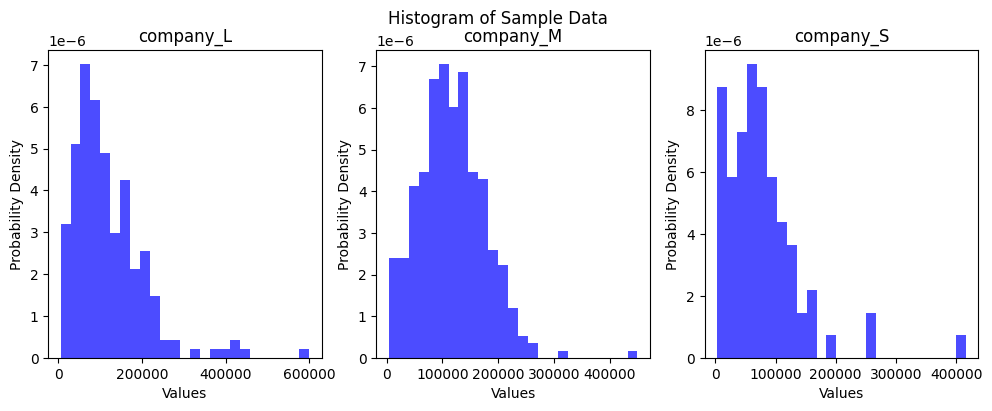

In [36]:
# Checking the shape of each group
bins = 25
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot histogram
fig.suptitle('Histogram of Sample Data')
plot_density(axes[0], company_L['salary_in_usd'], 'company_L', bins)
plot_density(axes[1], company_M['salary_in_usd'], 'company_M', bins)
plot_density(axes[2], company_S['salary_in_usd'], 'company_S', bins)

plt.show()

### Hypothesis testing

#### Hypotheses
$H_0$: there is no significant difference between salary median in companies with different size (L, M, S) taking into account all jobs
$H_1$: there is significant difference

In [37]:
# Print sizes of each group
print('L:', company_L.shape[0])
print('M:', company_M.shape[0])
print('S:', company_S.shape[0])

# Perform Kruskal-Wallis test for 3 groups
test_kruskal_3_groups(company_L['salary_in_usd'], company_M['salary_in_usd'], company_S['salary_in_usd'])

L: 198
M: 326
S: 83
p-Value of Kruskal-Wallis Test: 1.240200417426716e-08
Can reject H0


In [38]:
joined_data = [company_L['salary_in_usd'], company_M['salary_in_usd'], company_S['salary_in_usd']]
column_names = ["L", "M", "S"]

# Perform the posthoc_dunn() function
dunn_test(joined_data, column_names)

Dunns Test:
          L             M             S
L  1.000000  1.822200e-01  4.172618e-06
M  0.182220  1.000000e+00  5.101427e-09
S  0.000004  5.101427e-09  1.000000e+00



According to the results of the test and using the 0.05 significance level, we can conclude that there can be difference of salary between company of size S and M, and company of size S and L. 

### Plotting analysing data

Mean salaries depending on company size:
L : 119242.99494949495
M : 116905.46625766871
S : 77632.67469879518

Median salaries depending on company size:
L : 100000.0
M : 113188.0
S : 65000.0



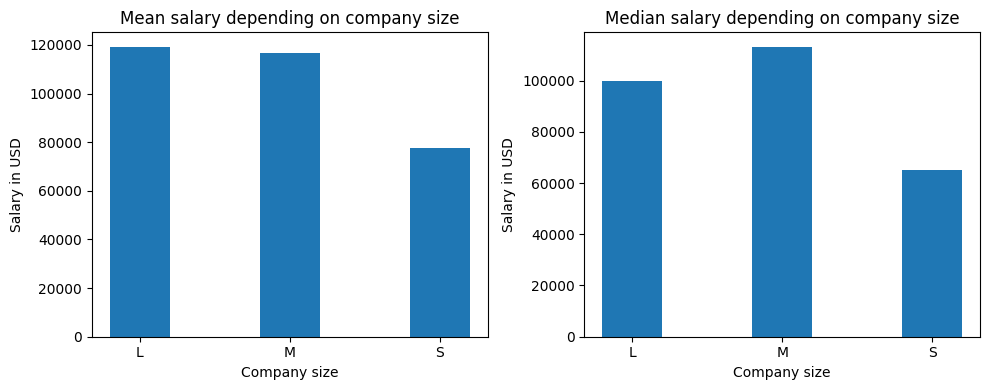

In [39]:
# Create the bar plot for salary means and medians depending on company size
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

# Plot means on the left subplot
mean_salaries = [company_L['salary_in_usd'].mean(), company_M['salary_in_usd'].mean(), company_S['salary_in_usd'].mean()]
plot_salaries(axes[0], column_names, mean_salaries, 'Mean salary depending on company size', 'Company size')

# Plot medians on the right subplot
median_salaries = [company_L['salary_in_usd'].median(), company_M['salary_in_usd'].median(), company_S['salary_in_usd'].median()]
plot_salaries(axes[1], column_names, median_salaries, 'Median salary depending on company size', 'Company size')

print("Mean salaries depending on company size:")
print_values(column_names, mean_salaries)

print("Median salaries depending on company size:")
print_values(column_names, median_salaries)

# Adjust layout
plt.tight_layout()
    
# Show the plot
plt.show()

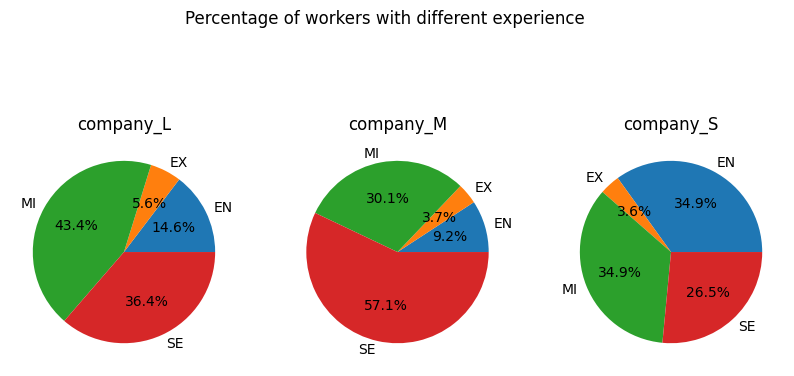

In [40]:
# Create pie charts of percentage of workers with different experience for each remote type
fig, ax = plt.subplots(1, 3, figsize = (10, 5))
ax[0].pie(np.array(company_L.groupby('experience_level').size()), labels=['EN', 'EX', 'MI', 'SE'], autopct='%1.1f%%')
ax[1].pie(np.array(company_M.groupby('experience_level').size()), labels=['EN', 'EX', 'MI', 'SE'], autopct='%1.1f%%')
ax[2].pie(np.array(company_S.groupby('experience_level').size()), labels=['EN', 'EX', 'MI', 'SE'], autopct='%1.1f%%')
fig.suptitle('Percentage of workers with different experience')
ax[0].set_title('company_L')
ax[1].set_title('company_M')
ax[2].set_title('company_S')
plt.show()

## Salary depending on employment type

Types of employment:
employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64


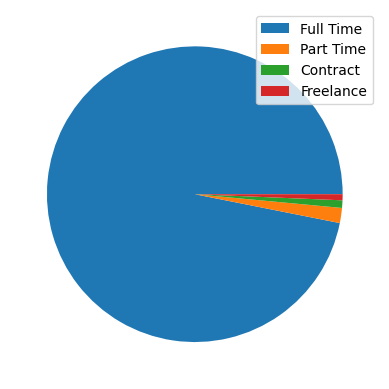

In [41]:
print("Types of employment:")
print(data['employment_type'].value_counts())
full_time = data.loc[data['employment_type']=='FT']
part_time = data.loc[data['employment_type']=='PT']
contract = data.loc[data['employment_type']=='CT']
freelance = data.loc[data['employment_type']=='FL']

# Plotting analysing data
plt.pie(np.array(data['employment_type'].value_counts()))
labels=['Full Time', 'Part Time', 'Contract', 'Freelance']
plt.legend(labels, loc='best')
plt.show()

### Shape distribution checking

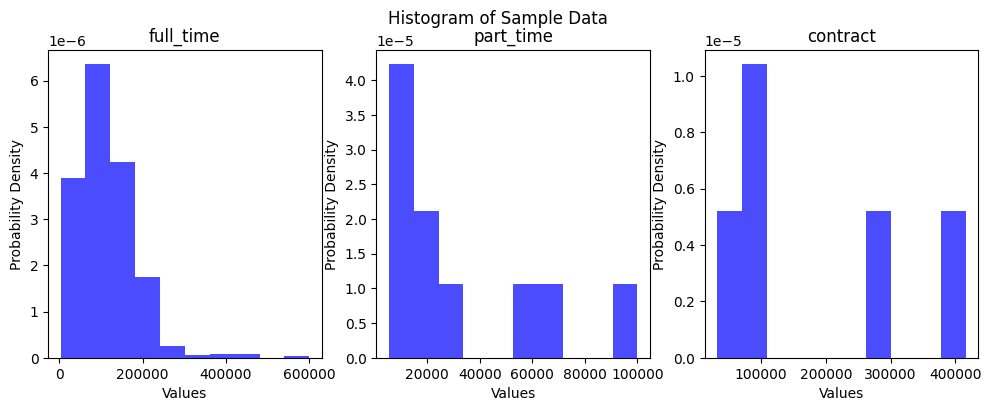

In [42]:
# Checking the shape of each group
bins = 10
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot histogram
fig.suptitle('Histogram of Sample Data')
plot_density(axes[0], full_time['salary_in_usd'], 'full_time', bins)
plot_density(axes[1], part_time['salary_in_usd'], 'part_time', bins)
plot_density(axes[2], contract['salary_in_usd'], 'contract', bins)

plt.show()

### Hypothesis testing

#### Hypotheses
$H_0$: there is no significant difference between salary median of different types of employment (full_time, part_time, contract) taking into account all jobs
$H_1$: there is significant difference

In [43]:
test_kruskal_3_groups(full_time['salary_in_usd'], part_time['salary_in_usd'], contract['salary_in_usd'])

joined_data = [full_time['salary_in_usd'], part_time['salary_in_usd'], contract['salary_in_usd']]
column_names = ["full_time", "part_time", "contract"]

dunn_test(joined_data, column_names)

p-Value of Kruskal-Wallis Test: 0.00012199645366253172
Can reject H0
Dunns Test:
           full_time  part_time  contract
full_time   1.000000   0.000098  0.408933
part_time   0.000098   1.000000  0.003925
contract    0.408933   0.003925  1.000000



According to the results of the test and using the 0.05 significance level, we can conclude that salary of part time workers is significantly different from full time workers and contract workers.

### Plotting analysing data

Mean salaries depending on employment type:
full_time : 113468.0731292517
part_time : 33070.5
contract : 184575.0

Median salaries depending on employment type:
full_time : 104196.5
part_time : 18817.5
contract : 105000.0



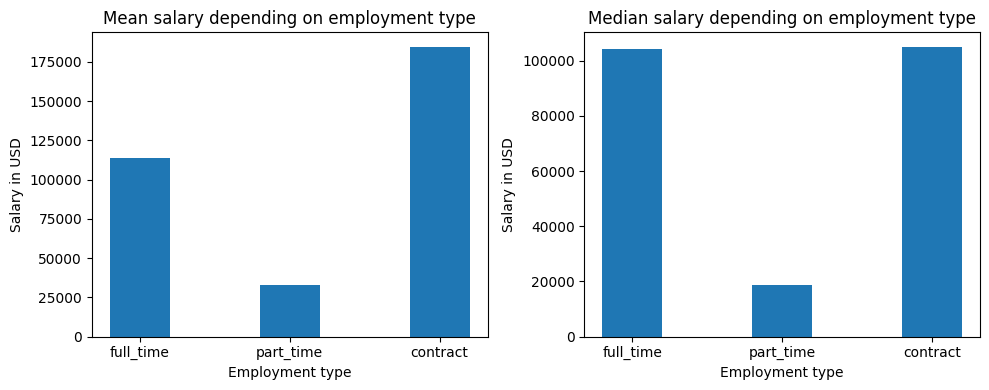

In [44]:
# Create the bar plot for salary means and medians depending on employment type
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

# Plot means on the left subplot
mean_salaries = [full_time['salary_in_usd'].mean(), part_time['salary_in_usd'].mean(), contract['salary_in_usd'].mean()]
plot_salaries(axes[0], column_names, mean_salaries, 'Mean salary depending on employment type', 'Employment type')

# Plot medians on the right subplot
median_salaries = [full_time['salary_in_usd'].median(), part_time['salary_in_usd'].median(), contract['salary_in_usd'].median()]
plot_salaries(axes[1], column_names, median_salaries, 'Median salary depending on employment type', 'Employment type')

print("Mean salaries depending on employment type:")
print_values(column_names, mean_salaries)

print("Median salaries depending on employment type:")
print_values(column_names, median_salaries)

# Adjust layout
plt.tight_layout()
    
# Show the plot
plt.show()

## Salary depending on country

In [45]:
print(data['company_location'].value_counts())

company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: count, dtype: int64


Due to number of workers in different countries, we decided to choose four countries (US, CA, GB, IN, DE) for further analysis.

In [46]:
US_data = data.loc[data['company_location']=='US']
CA_data = data.loc[data['company_location']=='CA']
GB_data = data.loc[data['company_location']=='GB']
IN_data = data.loc[data['company_location']=='IN']
DE_data = data.loc[data['company_location']=='DE']

### Shape distribution checking

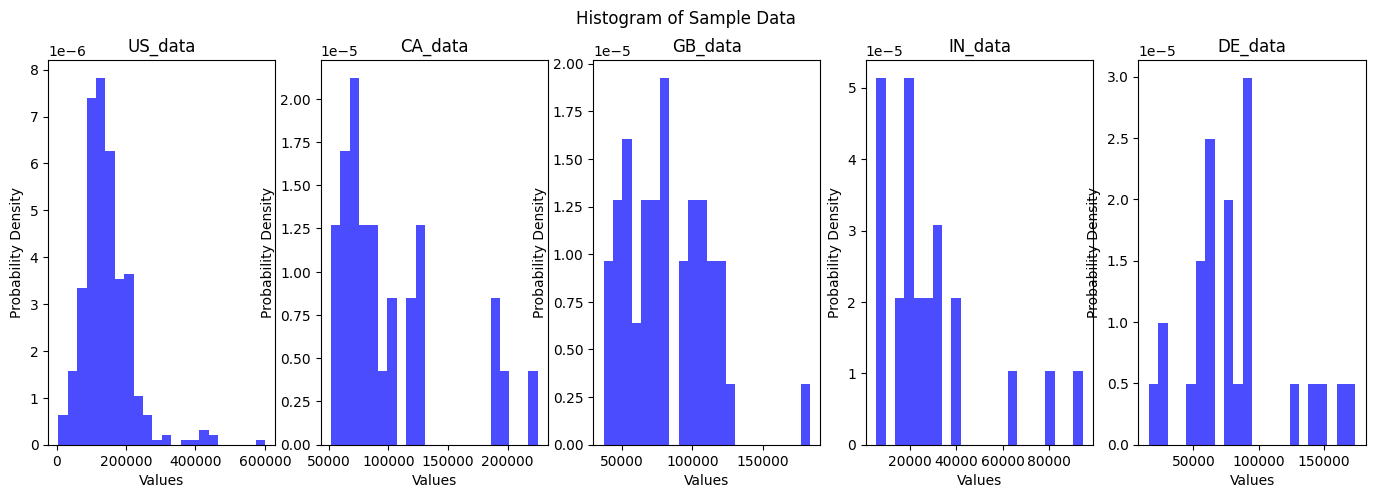

In [47]:
# Checking the shape of each group
bins = 22
fig, axes = plt.subplots(1, 5, figsize=(17, 5))

# Plot histogram
fig.suptitle('Histogram of Sample Data')
plot_density(axes[0], US_data['salary_in_usd'], 'US_data', bins)
plot_density(axes[1], CA_data['salary_in_usd'], 'CA_data', bins)
plot_density(axes[2], GB_data['salary_in_usd'], 'GB_data', bins)
plot_density(axes[3], IN_data['salary_in_usd'], 'IN_data', bins)
plot_density(axes[4], DE_data['salary_in_usd'], 'DE_data', bins)

plt.show()

### Hypothesis testing

#### Hypotheses
$H_0$: there is no significant difference between salary median for different countries (US, CA, GB, IN, DE) taking into account all jobs
$H_1$: there is significant difference

In [48]:
_, p_value = kruskal(US_data['salary_in_usd'], CA_data['salary_in_usd'], GB_data['salary_in_usd'], IN_data['salary_in_usd'], DE_data['salary_in_usd'])
print('p-value:', p_value)
if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

p-value: 1.9574145518699078e-29
Reject the null hypothesis


In [49]:
joined_data = [US_data['salary_in_usd'], CA_data['salary_in_usd'], GB_data['salary_in_usd'], IN_data['salary_in_usd'], DE_data['salary_in_usd']]
column_names = ["US_data", "CA_data", "GB_data", "IN_data", "DE_data"]

dunn_test(joined_data, column_names)

Dunns Test:
              US_data   CA_data       GB_data       IN_data       DE_data
US_data  1.000000e+00  0.000274  1.777755e-11  4.530171e-17  4.705184e-07
CA_data  2.744565e-04  1.000000  5.525845e-01  8.069644e-04  5.645538e-01
GB_data  1.777755e-11  0.552584  1.000000e+00  1.690336e-02  9.073247e-01
IN_data  4.530171e-17  0.000807  1.690336e-02  1.000000e+00  2.433682e-02
DE_data  4.705184e-07  0.564554  9.073247e-01  2.433682e-02  1.000000e+00



According to the results of the test and using the 0.05 significance level, we can conclude that salary of following countries (US, CA, GB, IN, DE) is significantly different: US and CA, US and GB, US and IN, US and DE, CA and IN, GB and IN, IN and DE.

### Plotting analysing data

Mean salaries depending on country:
US_data : 144055.26197183097
CA_data : 99823.73333333334
GB_data : 81583.0425531915
IN_data : 28581.75
DE_data : 81887.21428571429

Median salaries depending on country:
US_data : 135000.0
CA_data : 81895.5
GB_data : 78526.0
IN_data : 28581.75
DE_data : 81887.21428571429



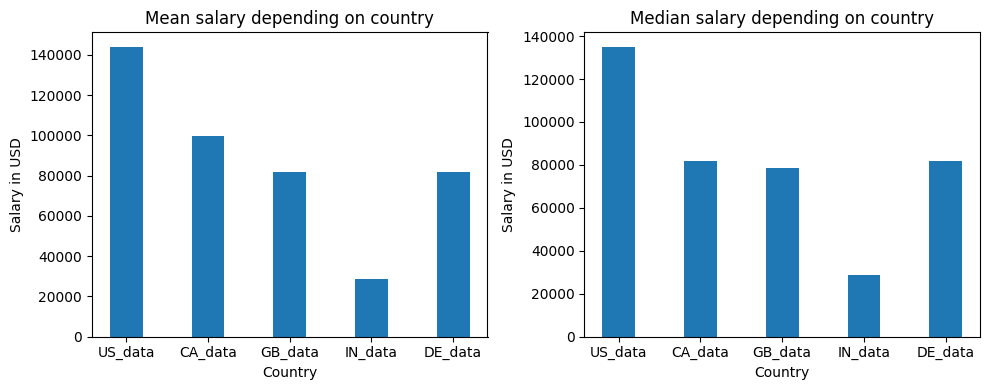

In [50]:
# Create the bar plot for salary means and medians depending on countries
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

# Plot means on the left subplot
mean_salaries = [US_data['salary_in_usd'].mean(), CA_data['salary_in_usd'].mean(), GB_data['salary_in_usd'].mean(), IN_data['salary_in_usd'].mean(), DE_data['salary_in_usd'].mean()]
plot_salaries(axes[0], column_names, mean_salaries, 'Mean salary depending on country', 'Country')

# Plot medians on the right subplot
median_salaries = [US_data['salary_in_usd'].median(), CA_data['salary_in_usd'].median(), GB_data['salary_in_usd'].median(), IN_data['salary_in_usd'].mean(), DE_data['salary_in_usd'].mean()]
plot_salaries(axes[1], column_names, median_salaries, 'Median salary depending on country', 'Country')

print("Mean salaries depending on country:")
print_values(column_names, mean_salaries)

print("Median salaries depending on country:")
print_values(column_names, median_salaries)

# Adjust layout
plt.tight_layout()
    
# Show the plot
plt.show()

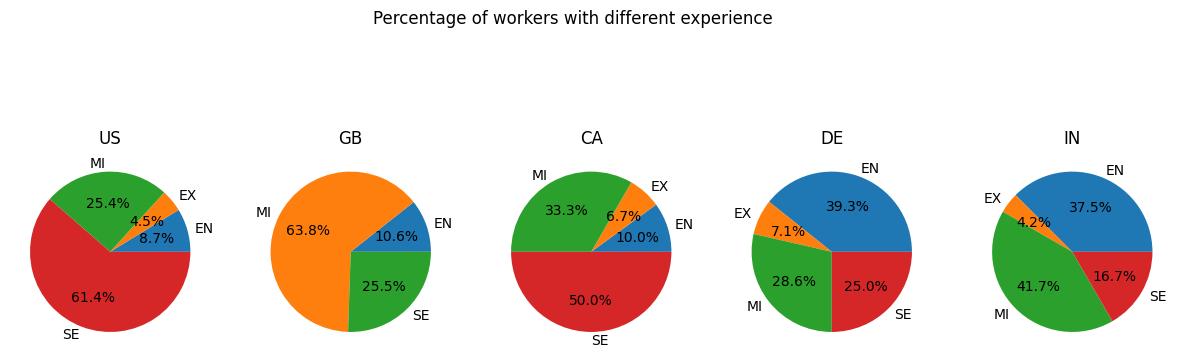

In [51]:
# Create pie charts of percentage of workers with different experience for each country
fig, ax = plt.subplots(1, 5, figsize = (15, 5))
ax[0].pie(np.array(US_data.groupby('experience_level').size()), labels=['EN', 'EX', 'MI', 'SE'], autopct='%1.1f%%')
ax[1].pie(np.array(GB_data.groupby('experience_level').size()), labels=['EN', 'MI', 'SE'], autopct='%1.1f%%')
ax[2].pie(np.array(CA_data.groupby('experience_level').size()), labels=['EN', 'EX', 'MI', 'SE'], autopct='%1.1f%%')
ax[3].pie(np.array(DE_data.groupby('experience_level').size()), labels=['EN', 'EX', 'MI', 'SE'], autopct='%1.1f%%')
ax[4].pie(np.array(IN_data.groupby('experience_level').size()), labels=['EN', 'EX', 'MI', 'SE'], autopct='%1.1f%%')
fig.suptitle('Percentage of workers with different experience')
ax[0].set_title('US')
ax[1].set_title('GB')
ax[2].set_title('CA')
ax[3].set_title('DE')
ax[4].set_title('IN')
plt.show()

# Analysing particular jobs (DS, DA, ML)

## Selecting jobs

From dataset we can distinguish 3 most numerically represented groups: machine learning specialists, data scientists and data analysts. At this stage, we want to compare salary between these 3 job types for workers with the same experience level.

In [52]:
# collect data associated with data scientists
data_scientists = data[data['job_title'].str.contains('Data Scientist') | data['job_title'].str.contains('Data Science')]

# print chosen jobs
data_scientists['job_title'].unique()

array(['Data Scientist', 'Lead Data Scientist', 'Data Science Consultant',
       'Director of Data Science', 'Principal Data Scientist',
       'Data Science Manager', 'Applied Data Scientist',
       'Data Science Engineer', 'Head of Data Science',
       'Staff Data Scientist'], dtype=object)

In [53]:
# collect data associated with machine learning
ml_specialists = data[data['job_title'].str.contains('Machine Learning') | data['job_title'].str.contains('Machine Learning Engineer') | data['job_title'].str.contains('ML')]

# print chosen jobs
ml_specialists['job_title'].unique()

array(['Machine Learning Scientist', 'Machine Learning Engineer',
       'Machine Learning Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'Machine Learning Developer', 'Applied Machine Learning Scientist',
       'Head of Machine Learning', 'Lead Machine Learning Engineer'],
      dtype=object)

In [54]:
# collect data associated with data analysts
data_analysts = data[data['job_title'].str.contains('Analyst')]

# print chosen jobs
data_analysts['job_title'].unique()

array(['Product Data Analyst', 'Data Analyst', 'Business Data Analyst',
       'Lead Data Analyst', 'BI Data Analyst', 'Marketing Data Analyst',
       'Financial Data Analyst', 'Finance Data Analyst',
       'Principal Data Analyst'], dtype=object)

## Salary depending on particular job

### Shape distribution checking

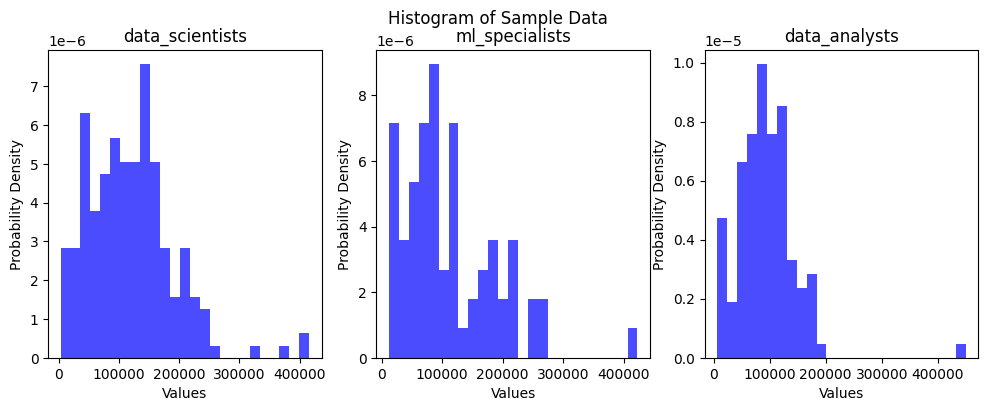

In [55]:
# Checking the shape of each group
bins = 25
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot histogram
fig.suptitle('Histogram of Sample Data')
plot_density(axes[0], data_scientists['salary_in_usd'], 'data_scientists', bins)
plot_density(axes[1], ml_specialists['salary_in_usd'], 'ml_specialists', bins)
plot_density(axes[2], data_analysts['salary_in_usd'], 'data_analysts', bins)

plt.show()

### Hypothesis testing

#### Hypotheses
$H_0$: there is no significant difference between salary median of data scientists, machine learning specialists, and data analysts
$H_1$: there is significant difference

In [56]:
# Print sizes of each group
print('data_scientists:', data_scientists.shape[0])
print('ml_specialists:', ml_specialists.shape[0])
print('data_analysts:', data_analysts.shape[0])

# Conduct the Kruskal-Wallis Test  for 3 groups
test_kruskal_3_groups(data_scientists['salary_in_usd'], ml_specialists['salary_in_usd'], data_analysts['salary_in_usd'])

data_scientists: 192
ml_specialists: 68
data_analysts: 119
p-Value of Kruskal-Wallis Test: 0.005045255010275862
Can reject H0


In [57]:
joined_data = [data_scientists['salary_in_usd'], ml_specialists['salary_in_usd'], data_analysts['salary_in_usd']]
column_names = ["data_scientists", "ml_specialists", "data_analysts"]

# Perform the posthoc_dunn() function
dunn_test(joined_data, column_names)

Dunns Test:
                 data_scientists  ml_specialists  data_analysts
data_scientists         1.000000        0.380988       0.003603
ml_specialists          0.380988        1.000000       0.380988
data_analysts           0.003603        0.380988       1.000000



Using p-values, we can observe that there is a significant difference in median wages between data scientists and data analysts.

### Plotting analysing data

Mean salaries depending on job title:
data_scientists : 119125.47916666667
ml_specialists : 113026.13235294117
data_analysts : 93200.3781512605

Median salaries depending on job title:
data_scientists : 115957.0
ml_specialists : 87932.0
data_analysts : 90320.0



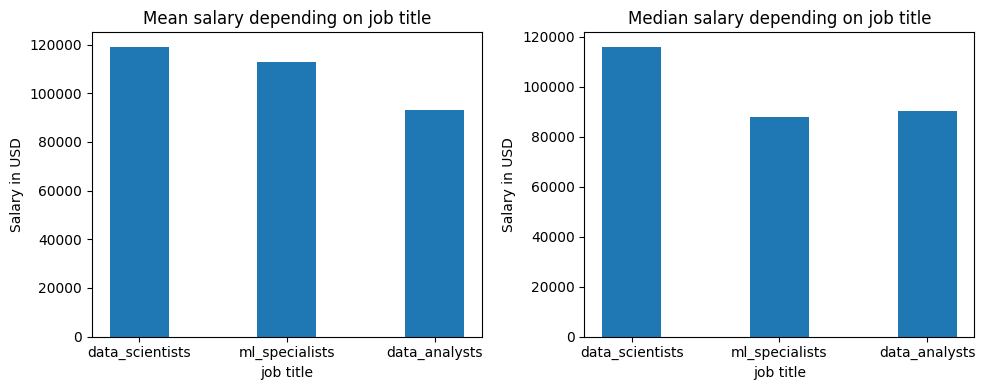

In [58]:
# Create the bar plot for salary means and medians depending on job title
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

# Plot means on the left subplot
mean_salaries = [data_scientists['salary_in_usd'].mean(), ml_specialists['salary_in_usd'].mean(), data_analysts['salary_in_usd'].mean()]
plot_salaries(axes[0], column_names, mean_salaries, 'Mean salary depending on job title', 'job title')

# Plot medians on the right subplot
median_salaries = [data_scientists['salary_in_usd'].median(), ml_specialists['salary_in_usd'].median(), data_analysts['salary_in_usd'].median()]
plot_salaries(axes[1], column_names, median_salaries, 'Median salary depending on job title', 'job title')

print("Mean salaries depending on job title:")
print_values(column_names, mean_salaries)

print("Median salaries depending on job title:")
print_values(column_names, median_salaries)

# Adjust layout
plt.tight_layout()
    
# Show the plot
plt.show()

## Salary of data scientists depending on experience level

In [59]:
# Collect data of data scientists associated with each experience level
SE_data_scientists = data_scientists.loc[data_scientists['experience_level']=='SE']
MI_data_scientists = data_scientists.loc[data_scientists['experience_level']=='MI']
EN_data_scientists = data_scientists.loc[data_scientists['experience_level']=='EN']
EX_data_scientists = data_scientists.loc[data_scientists['experience_level']=='EX']

### Shape distribution checking

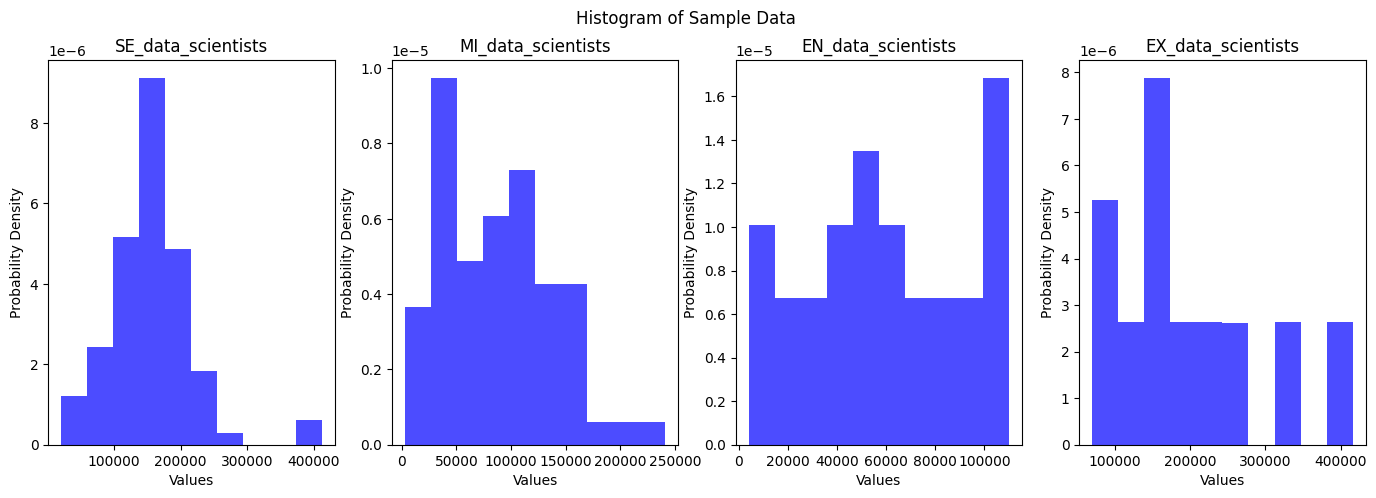

In [60]:
# Checking the shape of each group
bins = 10
fig, axes = plt.subplots(1, 4, figsize=(17, 5))

# Plot histogram
fig.suptitle('Histogram of Sample Data')
plot_density(axes[0], SE_data_scientists['salary_in_usd'], 'SE_data_scientists', bins)
plot_density(axes[1], MI_data_scientists['salary_in_usd'], 'MI_data_scientists', bins)
plot_density(axes[2], EN_data_scientists['salary_in_usd'], 'EN_data_scientists', bins)
plot_density(axes[3], EX_data_scientists['salary_in_usd'], 'EX_data_scientists', bins)

plt.show()

### Hypothesis testing

#### Hypotheses
$H_0$: there is no significant difference between salary median of data scientists with different experience levels
$H_1$: there is significant difference

In [61]:
# Print sizes of each group
print("Size of SE data scientists:", SE_data_scientists.shape[0])
print("Size of MI data scientists:", MI_data_scientists.shape[0])
print("Size of EN data scientists:", EN_data_scientists.shape[0])
print("Size of EX data scientists:", EX_data_scientists.shape[0])

# Conduct the Kruskal-Wallis Test for 4 groups
test_kruskal_4_groups(SE_data_scientists['salary_in_usd'], MI_data_scientists['salary_in_usd'], EN_data_scientists['salary_in_usd'], EX_data_scientists['salary_in_usd'])

Size of SE data scientists: 84
Size of MI data scientists: 69
Size of EN data scientists: 28
Size of EX data scientists: 11
p-Value of Kruskal-Wallis Test: 1.503133336016865e-16
Can reject H0


In [62]:
joined_data = [SE_data_scientists['salary_in_usd'], MI_data_scientists['salary_in_usd'], EN_data_scientists['salary_in_usd'], EX_data_scientists['salary_in_usd']]
column_names = ["SE", "MI", "EN", "EX"]

# Perform the posthoc_dunn() function
dunn_test(joined_data, column_names)

Dunns Test:
              SE            MI            EN        EX
SE  1.000000e+00  5.809538e-10  9.579208e-12  0.435547
MI  5.809538e-10  1.000000e+00  5.440596e-02  0.000194
EN  9.579208e-12  5.440596e-02  1.000000e+00  0.000002
EX  4.355465e-01  1.940068e-04  1.904475e-06  1.000000



According to the results of the test and using the 0.05 significance level, we can conclude that salary of SE and MI, SE and EN, MI and EX, EN and EX data scientists are significantly different.

### Plotting analysing data

Mean salaries of data scientists:
SE : 154984.07142857142
MI : 87721.37681159421
EN : 58590.03571428572
EX : 196375.81818181818

Median salaries of data scientists:
SE : 147130.5
MI : 82500.0
EN : 55198.0
EX : 167875.0



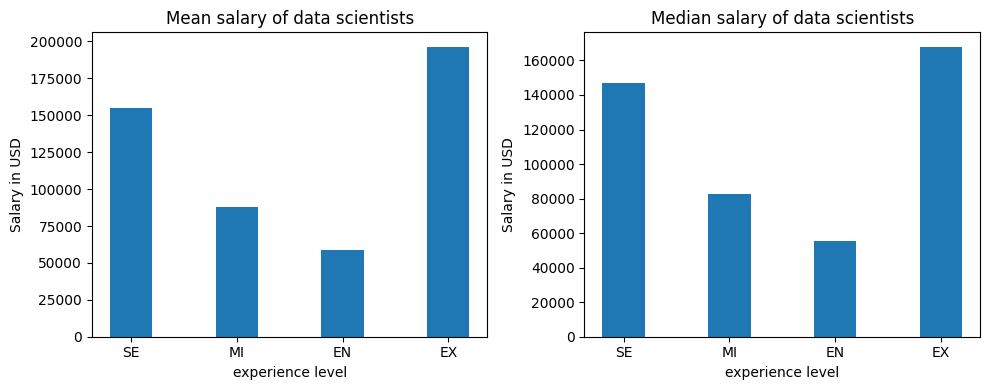

In [63]:
# Create the bar plot for salary means and medians of data scientists depending on experience level
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

# Plot means on the left subplot
mean_salaries = [SE_data_scientists['salary_in_usd'].mean(), MI_data_scientists['salary_in_usd'].mean(), EN_data_scientists['salary_in_usd'].mean(), EX_data_scientists['salary_in_usd'].mean()]
plot_salaries(axes[0], column_names, mean_salaries, 'Mean salary of data scientists', 'experience level')

# Plot medians on the right subplot
median_salaries = [SE_data_scientists['salary_in_usd'].median(), MI_data_scientists['salary_in_usd'].median(), EN_data_scientists['salary_in_usd'].median(), EX_data_scientists['salary_in_usd'].median()]
plot_salaries(axes[1], column_names, median_salaries, 'Median salary of data scientists', 'experience level')

print("Mean salaries of data scientists:")
print_values(column_names, mean_salaries)

print("Median salaries of data scientists:")
print_values(column_names, median_salaries)

# Adjust layout
plt.tight_layout()
    
# Show the plot
plt.show()

## Salary of machine learning specialists depending on experience level

In [64]:
# Collect data of machine learning specialists associated with each experience level
SE_ml = ml_specialists.loc[ml_specialists['experience_level']=='SE']
MI_ml = ml_specialists.loc[ml_specialists['experience_level']=='MI']
EN_ml = ml_specialists.loc[ml_specialists['experience_level']=='EN']
EX_ml = ml_specialists.loc[ml_specialists['experience_level']=='EX']

### Shape distribution checking

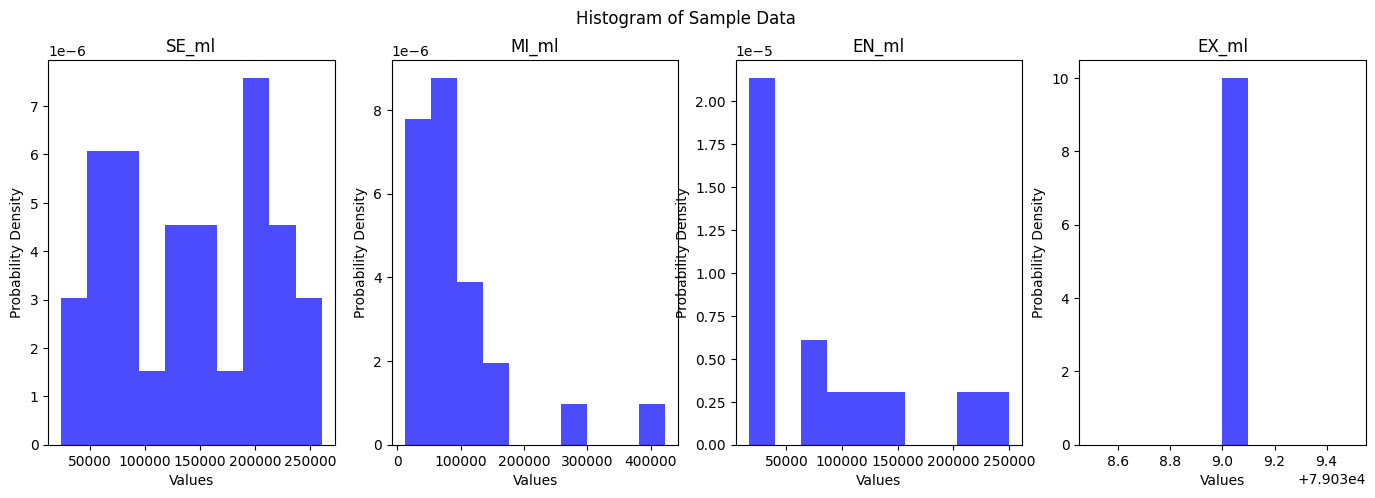

In [65]:
# Checking the shape of each group
bins = 10
fig, axes = plt.subplots(1, 4, figsize=(17, 5))

# Plot histogram
fig.suptitle('Histogram of Sample Data')
plot_density(axes[0], SE_ml['salary_in_usd'], 'SE_ml', bins)
plot_density(axes[1], MI_ml['salary_in_usd'], 'MI_ml', bins)
plot_density(axes[2], EN_ml['salary_in_usd'], 'EN_ml', bins)
plot_density(axes[3], EX_ml['salary_in_usd'], 'EX_ml', bins)

plt.show()

### Hypothesis testing

#### Hypotheses
$H_0$: there is no significant difference between salary median of machine learning specialists with different experience levels
$H_1$: there is significant difference

In [66]:
# Print size of each group
print('Number of SE_ml_scientists:', SE_ml.shape[0])
print('Number of MI_ml_scientists:', MI_ml.shape[0])
print('Number of EN_ml_scientists:', EN_ml.shape[0])
print('Number of EX_ml_scientists:', EX_ml.shape[0])

# Conduct the Kruskal-Wallis Test
test_kruskal_3_groups(SE_ml['salary_in_usd'], MI_ml['salary_in_usd'], EN_ml['salary_in_usd'])

Number of SE_ml_scientists: 28
Number of MI_ml_scientists: 25
Number of EN_ml_scientists: 14
Number of EX_ml_scientists: 1
p-Value of Kruskal-Wallis Test: 0.008036069152809565
Can reject H0


In [67]:
joined_data = [SE_ml['salary_in_usd'], MI_ml['salary_in_usd'], EN_ml['salary_in_usd']]
column_names = ["SE", "MI", "EN"]

# Perform the posthoc_dunn() function
dunn_test(joined_data, column_names)

Dunns Test:
          SE        MI        EN
SE  1.000000  0.025238  0.021548
MI  0.025238  1.000000  0.561962
EN  0.021548  0.561962  1.000000



According to the results of the test and using the 0.05 significance level, we can conclude that salary of SE is significantly different from MI and EN machine learning specialists.

### Plotting analysing data

Mean salaries of ml specialists:
SE : 141548.10714285713
MI : 98624.0
EN : 84127.92857142857

Median salaries of ml specialists:
SE : 135000.0
MI : 77364.0
EN : 59150.0



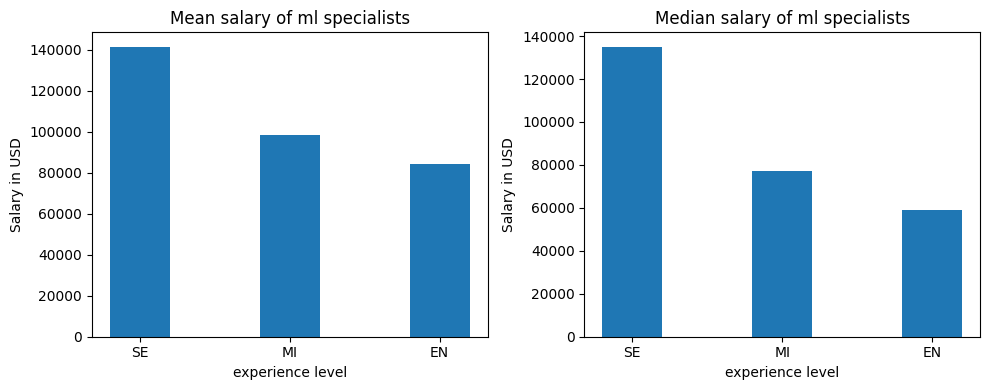

In [68]:
# Create the bar plot for salary means and medians of ml specialists depending on experience level
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

# Plot means on the left subplot
mean_salaries = [SE_ml['salary_in_usd'].mean(), MI_ml['salary_in_usd'].mean(), EN_ml['salary_in_usd'].mean()]
plot_salaries(axes[0], column_names, mean_salaries, 'Mean salary of ml specialists', 'experience level')

# Plot medians on the right subplot
median_salaries = [SE_ml['salary_in_usd'].median(), MI_ml['salary_in_usd'].median(), EN_ml['salary_in_usd'].median()]
plot_salaries(axes[1], column_names, median_salaries, 'Median salary of ml specialists', 'experience level')

print("Mean salaries of ml specialists:")
print_values(column_names, mean_salaries)

print("Median salaries of ml specialists:")
print_values(column_names, median_salaries)

# Adjust layout
plt.tight_layout()
    
# Show the plot
plt.show()

## Salary of data analysts depending on experience level

In [69]:
SE_data_analysts = data_analysts.loc[data_analysts['experience_level']=='SE']
MI_data_analysts = data_analysts.loc[data_analysts['experience_level']=='MI']
EN_data_analysts = data_analysts.loc[data_analysts['experience_level']=='EN']
EX_data_analysts = data_analysts.loc[data_analysts['experience_level']=='EX']

### Shape distribution checking

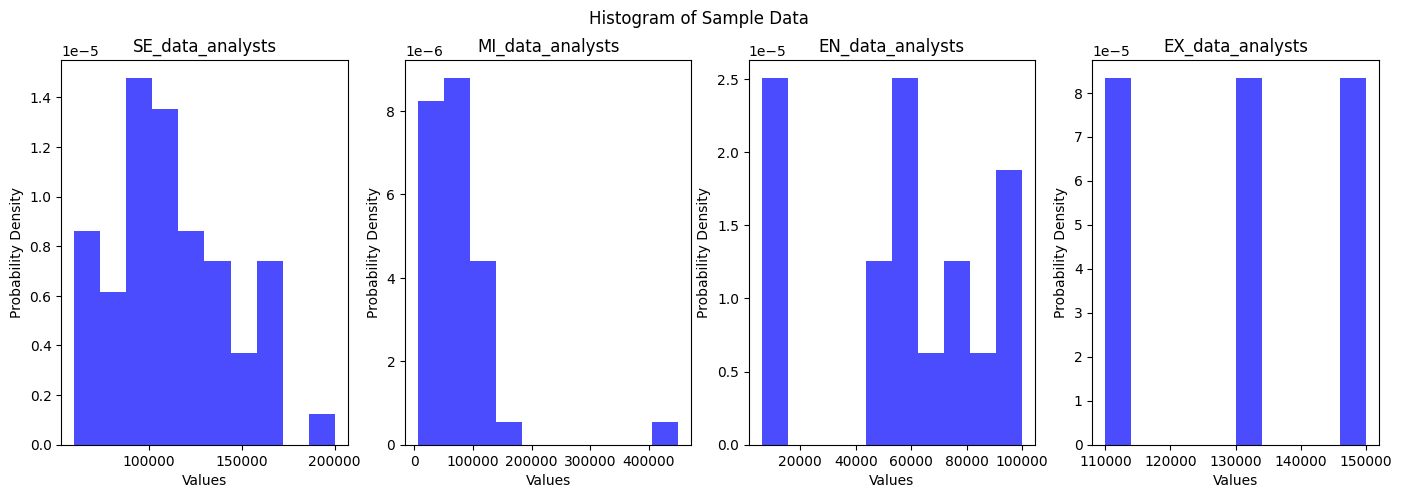

In [70]:
# Checking the shape of each group
bins = 10
fig, axes = plt.subplots(1, 4, figsize=(17, 5))

# Plot histogram
fig.suptitle('Histogram of Sample Data')
plot_density(axes[0], SE_data_analysts['salary_in_usd'], 'SE_data_analysts', bins)
plot_density(axes[1], MI_data_analysts['salary_in_usd'], 'MI_data_analysts', bins)
plot_density(axes[2], EN_data_analysts['salary_in_usd'], 'EN_data_analysts', bins)
plot_density(axes[3], EX_data_analysts['salary_in_usd'], 'EX_data_analysts', bins)

plt.show()

### Hypothesis testing

#### Hypotheses
$H_0$: there is no significant difference between salary median of data analysts with different experience levels
$H_1$: there is significant difference

In [71]:
# Print size of each group
print('Number of SE_data_analysts:', SE_data_analysts.shape[0])
print('Number of MI_data_analysts:', MI_data_analysts.shape[0])
print('Number of EN_data_analysts:', EN_data_analysts.shape[0])
print('Number of EX_data_analysts:', EX_data_analysts.shape[0])

test_kruskal_3_groups(SE_data_analysts['salary_in_usd'], MI_data_analysts['salary_in_usd'], EN_data_analysts['salary_in_usd'])

Number of SE_data_analysts: 58
Number of MI_data_analysts: 41
Number of EN_data_analysts: 17
Number of EX_data_analysts: 3
p-Value of Kruskal-Wallis Test: 9.359981989504296e-09
Can reject H0


In [72]:
joined_data = [SE_data_analysts['salary_in_usd'], MI_data_analysts['salary_in_usd'], EN_data_analysts['salary_in_usd']]
column_names = ["SE", "MI", "EN"]

# Perform the posthoc_dunn() function
dunn_test(joined_data, column_names)

Dunns Test:
          SE        MI        EN
SE  1.000000  0.000002  0.000003
MI  0.000002  1.000000  0.294721
EN  0.000003  0.294721  1.000000



According to the results of the test and using the 0.05 significance level, we can conclude that salary of SE is significantly different from MI and EN data analysts.

### Plotting analysing data

Mean salaries of data analysts:
SE : 112661.58620689655
MI : 77940.75609756098
EN : 57111.882352941175

Median salaries of data analysts:
SE : 111912.5
MI : 65438.0
EN : 59102.0



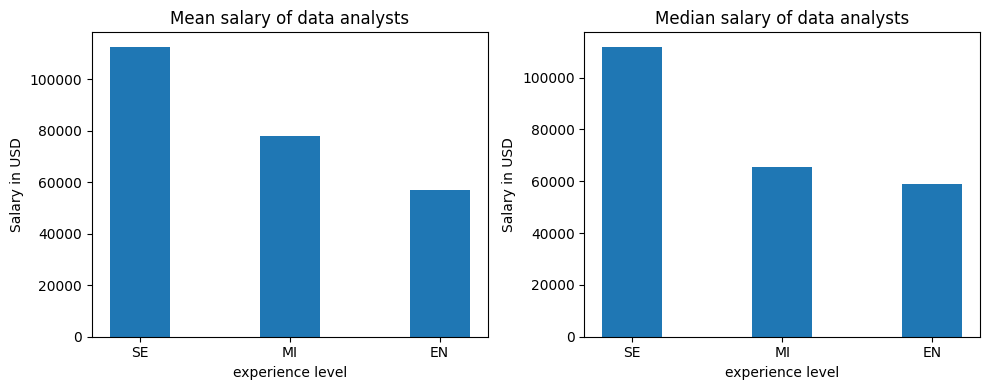

In [73]:
# Create the bar plot for salary means and medians of data analysts depending on experience level
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

# Plot means on the left subplot
mean_salaries = [SE_data_analysts['salary_in_usd'].mean(), MI_data_analysts['salary_in_usd'].mean(), EN_data_analysts['salary_in_usd'].mean()]
plot_salaries(axes[0], column_names, mean_salaries, 'Mean salary of data analysts', 'experience level')

# Plot medians on the right subplot
median_salaries = [SE_data_analysts['salary_in_usd'].median(), MI_data_analysts['salary_in_usd'].median(), EN_data_analysts['salary_in_usd'].median()]
plot_salaries(axes[1], column_names, median_salaries, 'Median salary of data analysts', 'experience level')

print("Mean salaries of data analysts:")
print_values(column_names, mean_salaries)

print("Median salaries of data analysts:")
print_values(column_names, median_salaries)

# Adjust layout
plt.tight_layout()
    
# Show the plot
plt.show()

## Salary of middle depending on job title

#### Hypotheses
$H_0$: there is no significant difference between middle salary median of data scientists, machine learning specialists, and data analysts
$H_1$: there is significant difference

In [74]:
# middle from ML, DS, DA salary
ml_MI_salary = MI_ml['salary_in_usd']
ds_MI_salary = MI_data_scientists['salary_in_usd']
da_MI_salary = MI_data_analysts['salary_in_usd']

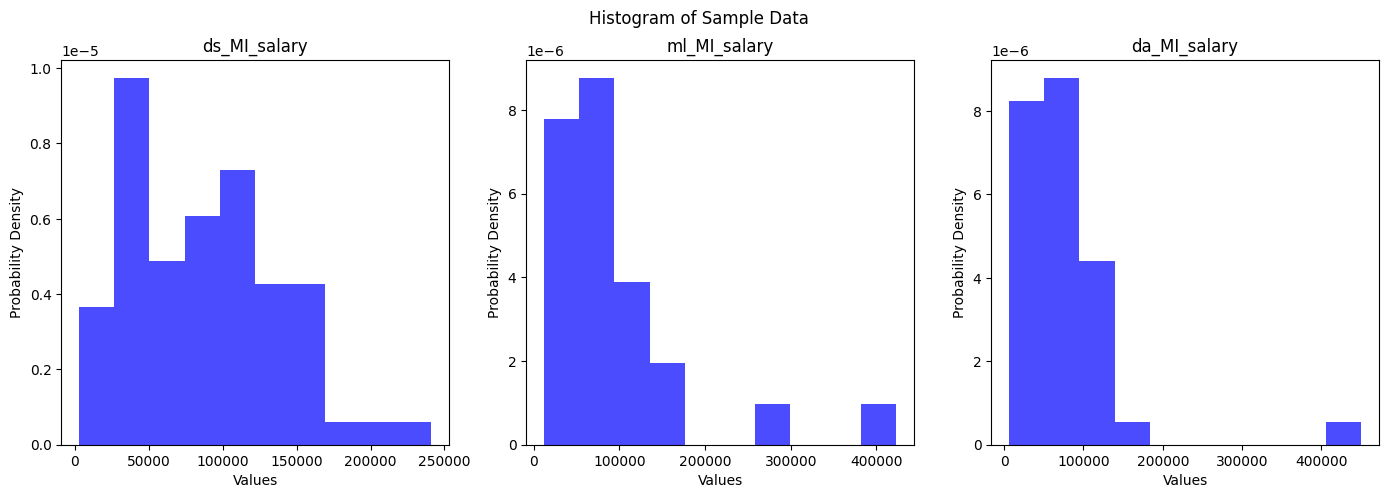

In [75]:
# Checking the shape of each group
bins = 10
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

# Plot histogram
fig.suptitle('Histogram of Sample Data')
plot_density(axes[0], ds_MI_salary, 'ds_MI_salary', bins)
plot_density(axes[1], ml_MI_salary, 'ml_MI_salary', bins)
plot_density(axes[2], da_MI_salary, 'da_MI_salary', bins)

plt.show()

In [76]:
print("Size of middle for DS:", ds_MI_salary.shape[0])
print("Size of middle for ML:", ml_MI_salary.shape[0])
print("Size of middle for DA:", da_MI_salary.shape[0])

test_kruskal_3_groups(ml_MI_salary, ds_MI_salary, da_MI_salary)

Size of middle for DS: 69
Size of middle for ML: 25
Size of middle for DA: 41
p-Value of Kruskal-Wallis Test: 0.26356208409118975
Failed to reject H0


## Salary of seniors depending on job title

#### Hypotheses
$H_0$: there is no significant difference between senior salary median of data scientists, machine learning specialists, and data analysts
$H_1$: there is significant difference

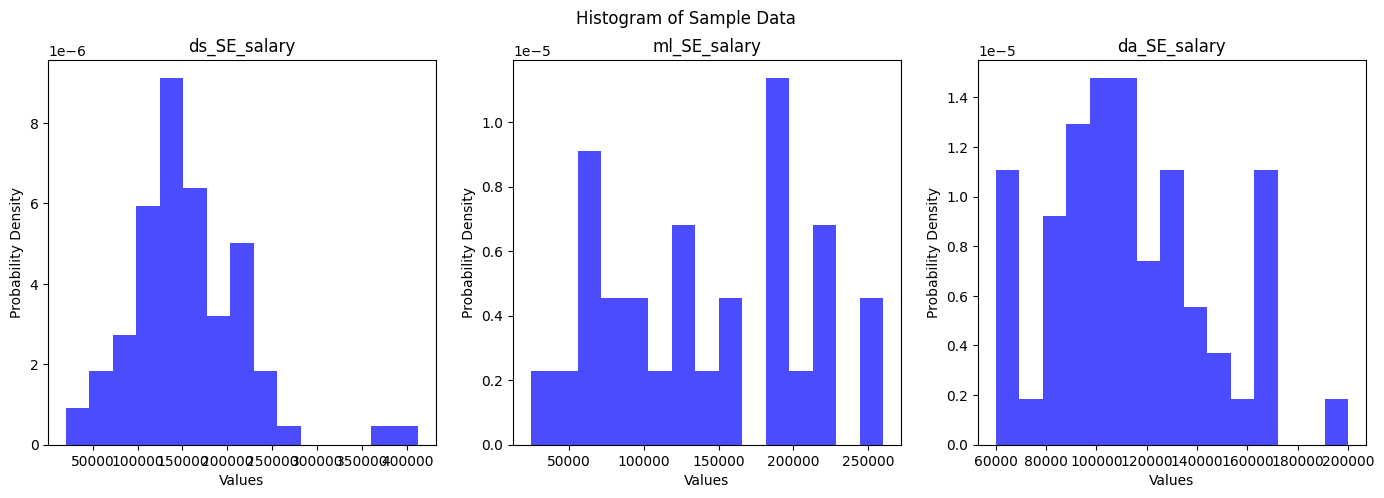

Size of seniors for DS: 84
Size of seniors for ML: 28
Size of seniors for DA: 58
p-Value of Kruskal-Wallis Test: 1.565313179046367e-05
Can reject H0
Dunns Test:
          ML        DS        DA
ML  1.000000  0.224174  0.039589
DS  0.224174  1.000000  0.000008
DA  0.039589  0.000008  1.000000



In [77]:
# middle from ML, DS, DA salary
ml_SE_salary = SE_ml['salary_in_usd']
ds_SE_salary = SE_data_scientists['salary_in_usd']
da_SE_salary = SE_data_analysts['salary_in_usd']

# Checking the shape of each group
bins = 15
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

# Plot histogram
fig.suptitle('Histogram of Sample Data')
plot_density(axes[0], ds_SE_salary, 'ds_SE_salary', bins)
plot_density(axes[1], ml_SE_salary, 'ml_SE_salary', bins)
plot_density(axes[2], da_SE_salary, 'da_SE_salary', bins)

plt.show()

print("Size of seniors for DS:", ds_SE_salary.shape[0])
print("Size of seniors for ML:", ml_SE_salary.shape[0])
print("Size of seniors for DA:", da_SE_salary.shape[0])

test_kruskal_3_groups(ml_SE_salary, ds_SE_salary, da_SE_salary)

joined_data = [ml_SE_salary, ds_SE_salary, da_SE_salary]
column_names = ["ML", "DS", "DA"]

dunn_test(joined_data, column_names)

Mean salaries of seniors:
ML : 154984.07142857142
DS : 141548.10714285713
DA : 112661.58620689655

Median salaries of seniors:
ML : 147130.5
DS : 135000.0
DA : 111912.5



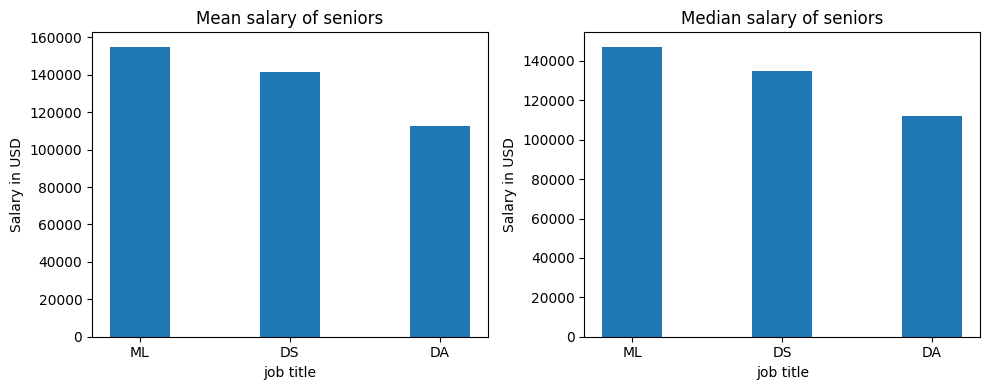

In [78]:
# Create the bar plot for salary means and medians of data analysts depending on experience level
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

# Plot means on the left subplot
mean_salaries = [ds_SE_salary.mean(), ml_SE_salary.mean(), da_SE_salary.mean()]
plot_salaries(axes[0], column_names, mean_salaries, 'Mean salary of seniors', 'job title')

# Plot medians on the right subplot
median_salaries = [ds_SE_salary.median(), ml_SE_salary.median(), da_SE_salary.median()]
plot_salaries(axes[1], column_names, median_salaries, 'Median salary of seniors', 'job title')

print("Mean salaries of seniors:")
print_values(column_names, mean_salaries)

print("Median salaries of seniors:")
print_values(column_names, median_salaries)

# Adjust layout
plt.tight_layout()
    
# Show the plot
plt.show()

## Salary of juniors depending on job title

#### Hypotheses
$H_0$: there is no significant difference between junior salary median of data scientists, machine learning specialists, and data analysts
$H_1$: there is significant difference

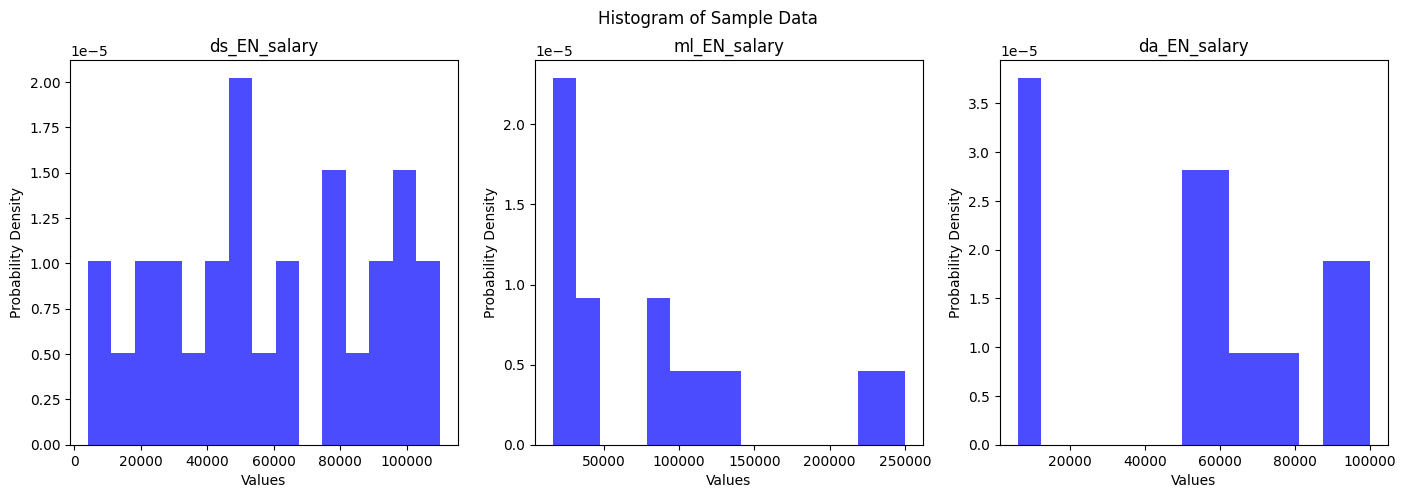

Size of juniors for DS: 28
Size of juniors for ML: 14
Size of juniors for DA: 17
p-Value of Kruskal-Wallis Test: 0.8073987464421589
Failed to reject H0


In [79]:
# salary of juniors from ML, DS, DA
ml_EN_salary = EN_ml['salary_in_usd']
ds_EN_salary = EN_data_scientists['salary_in_usd']
da_EN_salary = EN_data_analysts['salary_in_usd']

# Checking the shape of each group
bins = 15
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

# Plot histogram
fig.suptitle('Histogram of Sample Data')
plot_density(axes[0], ds_EN_salary, 'ds_EN_salary', bins)
plot_density(axes[1], ml_EN_salary, 'ml_EN_salary', bins)
plot_density(axes[2], da_EN_salary, 'da_EN_salary', bins)

plt.show()

print("Size of juniors for DS:", ds_EN_salary.shape[0])
print("Size of juniors for ML:", ml_EN_salary.shape[0])
print("Size of juniors for DA:", da_EN_salary.shape[0])

test_kruskal_3_groups(ml_EN_salary, ds_EN_salary, da_EN_salary)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=79ccdadc-ba17-4805-887e-c0633088ed33' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>